In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib

In [2]:
data = pd.read_csv('FINAL_ARXIV_2025_with_affiliations.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,comments,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing..."
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,"19 pages, 12 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,Accepted for publication in IEEE Transactions ...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[]
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,Proceeding presented at the 8th Heidelberg Int...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',..."
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,"19 pages, 12 figures, ApJ accepted",NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[]
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,"16 pages, 13 figures, accepted for publication...",NaN,0,NaN,0.0,0.0,1,1,"['AGN', 'AGNs', 'Active galactic nuclei']",['Active galactic nuclei (16) - Light curves (...
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,"42 pages, 17 figures, 11 tables. Comments are ...",NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Dark energy', 'Fitting']",['cosmological parameters from LSS – power spe...
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,"18 pages, 18 figures",NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0,"['Cooling fl

In [ ]:
# List of SubFields
subfields = [
    # --- Original 50 ---
    'Weak Lensing',
    'Strong Lensing',
    'Galaxy Clusters',
    'Supernova',
    'Exoplanets',
    'Cosmic Microwave Background',
    'Large-Scale Structure',
    'Dark Matter',
    'Dark Energy',
    'Galaxy Formation',
    'Galaxy Evolution',
    'Active Galactic Nuclei',
    'Quasars',
    'Stellar Evolution',
    'Stellar Dynamics',
    'Star Formation',
    'Interstellar Medium',
    'Circumstellar Disks',
    'Planet Formation',
    'Gravitational Waves',
    'Black Holes',
    'Neutron Stars',
    'Pulsars',
    'Fast Radio Bursts',
    'Gamma-Ray Bursts',
    'Cosmic Rays',
    'Astrochemistry',
    'Astrobiology',
    'Solar Physics',
    'Helioseismology',
    'Magnetohydrodynamics',
    'Accretion Disks',
    'Simulations',
    'Computational Astrophysics',
    'Time-Domain Astronomy',
    'Multi-Messenger Astronomy',
    'Cosmological Simulations',
    'Epoch of Reionization',
    'Population III Stars',
    'Stellar Populations',
    'Galactic Archaeology',
    'Stellar Streams',
    'Tidal Disruption Events',
    'Compact Object Binaries',

    # --- Additional 50 (Cosmology-heavy) ---
    'Inflation',
    'Early Universe',
    'Primordial Black Holes',
    'Baryon Acoustic Oscillations',
    'Redshift-Space Distortions',
    'Scalar-Tensor Gravity',
    'Hubble Tension',
    'Cosmic Distance Ladder',
    'Standard Sirens',
    'Structure Formation',
    'Dark Matter Haloes',
    'Dark Matter Direct Detection',
    'Self-Interacting Dark Matter',
    'Warm Dark Matter',
    'Ultra-Light Dark Matter',
    'Axions',
    'Neutrino Cosmology',
    'Relic Neutrinos',
    'Big Bang Nucleosynthesis',
    'Cosmic Reionization',
    '21cm Cosmology',
    'Cosmic Voids',
    'Machine Learning',
    'Artifical Intelligence',
    'Sunyaev-Zel’dovich Effect',
    'Sub-Haloes',
]

short_form_subfields_dict = {
    'Weak Lensing': 'Weak Gravitational Lensing',
    'Strong Lensing': 'Strong Gravitational Lensing',
    'Cosmic Microwave Background': 'CMB',
    'Sunyaev-Zel’dovich Effect': 'SZ Effect',
    'Machine Learning': 'ML',
    'Artifaical Intelligence': 'AI',
    'Black Holes': 'Balck Hole',
    'Pulsars': 'Pulsar',
    'Neutron Stars': 'Neutron Star',
    'Fast Radio Bursts': 'FRB',
    'Gamma-Ray Bursts': 'GRB',
    'Tidal Disruption Events': 'TDE',
    'Hubble Tension': 'Crisis in Cosmology',
}

data['subfields'] = None

# Assigning 1 Subfield to every Papers based on most frequently repeated Subfield or short form mapping 

import pandas as pd
import re
from collections import Counter

# --- Normalize subfield aliases ---
# Build reverse mapping: alias -> canonical subfield
alias_to_subfield = {}

for full, short in short_form_subfields_dict.items():
    alias_to_subfield[short.lower()] = full

# Add canonical names themselves as aliases
for sf in subfields:
    alias_to_subfield[sf.lower()] = sf

# Precompile regex patterns for speed
alias_patterns = {
    alias: re.compile(rf'\b{re.escape(alias)}\b', re.IGNORECASE)
    for alias in alias_to_subfield
}

# --- Subfield assignment function ---
def assign_subfield(title, abstract):
    text = f"{title} {abstract}".lower()
    counts = Counter()

    for alias, pattern in alias_patterns.items():
        matches = pattern.findall(text)
        if matches:
            canonical = alias_to_subfield[alias]
            counts[canonical] += len(matches)

    if counts:
        # Return most frequent subfield
        return counts.most_common(1)[0][0]
    else:
        return 'Unclassified'

# --- Apply to dataset ---
data['subfields'] = data.apply(
    lambda row: assign_subfield(row['title'], row['abstract']),
    axis=1
)


In [22]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,subfields
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",Machine Learning
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,Black Holes
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],Unclassified
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",Supernova
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,Simulations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18331,Systematic search of laser and phase modulatio...,Heterodyne interferometry for precision scienc...,"['Kohei Yamamoto', 'Olaf Hartwig', 'Lennart Wi...",8.0,24.0,0.0,arxiv.org/pdf/2512.17802,Instrumentation and Methods for Astrophysics,"['Applied Physics', 'Optics']",NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Gravitational wave detectors', 'Heterodyne i...",[],Unclassified
18332,Investigating the AGN variability timescale --...,Active galactic nuclei (AGNs) exhibit variabil...,"['Adrien Hélias', 'Sarah C. Gallagher', 'Pauli...",13.0,16.0,1.0,arxiv.org/pdf/2512.17811,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['AGN', 'AGNs', 'Active galactic nuclei']",['Active galactic nuclei (16) - Light curves (...,Active Galactic Nuclei
18333,Constraining primordial non-Gaussianity from D...,We present the first measurement of local-type...,"['Sofia Chiarenza', 'Alex Krolewski', 'Marco B...",17.0,42.0,11.0,arxiv.org/pdf/2512.17865,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['CMB', 'Dark energy', 'Fitting']",['cosmological parameters from LSS – power spe...,Quasars
18334,On the complex nature of coronal heating,A large part of the hot corona consists of mag...,"['C.A. Breu', 'D.I. Pontin', 'E. Priest', 'I. ...",18.0,18.0,2.0,arxiv.org/pdf/2512.17880,Solar and Stellar Astrophysics,NaN,NaN,...,NaN,0,"Breu, C. A.: School of Mathematics and Statist...",0.0,0.0,0,0,"['Cooling flows', 'MHD', 'Plasma physics']",['Sun:corona – Sun:magnetic fields 1 INTRODUCT...,Unclassified


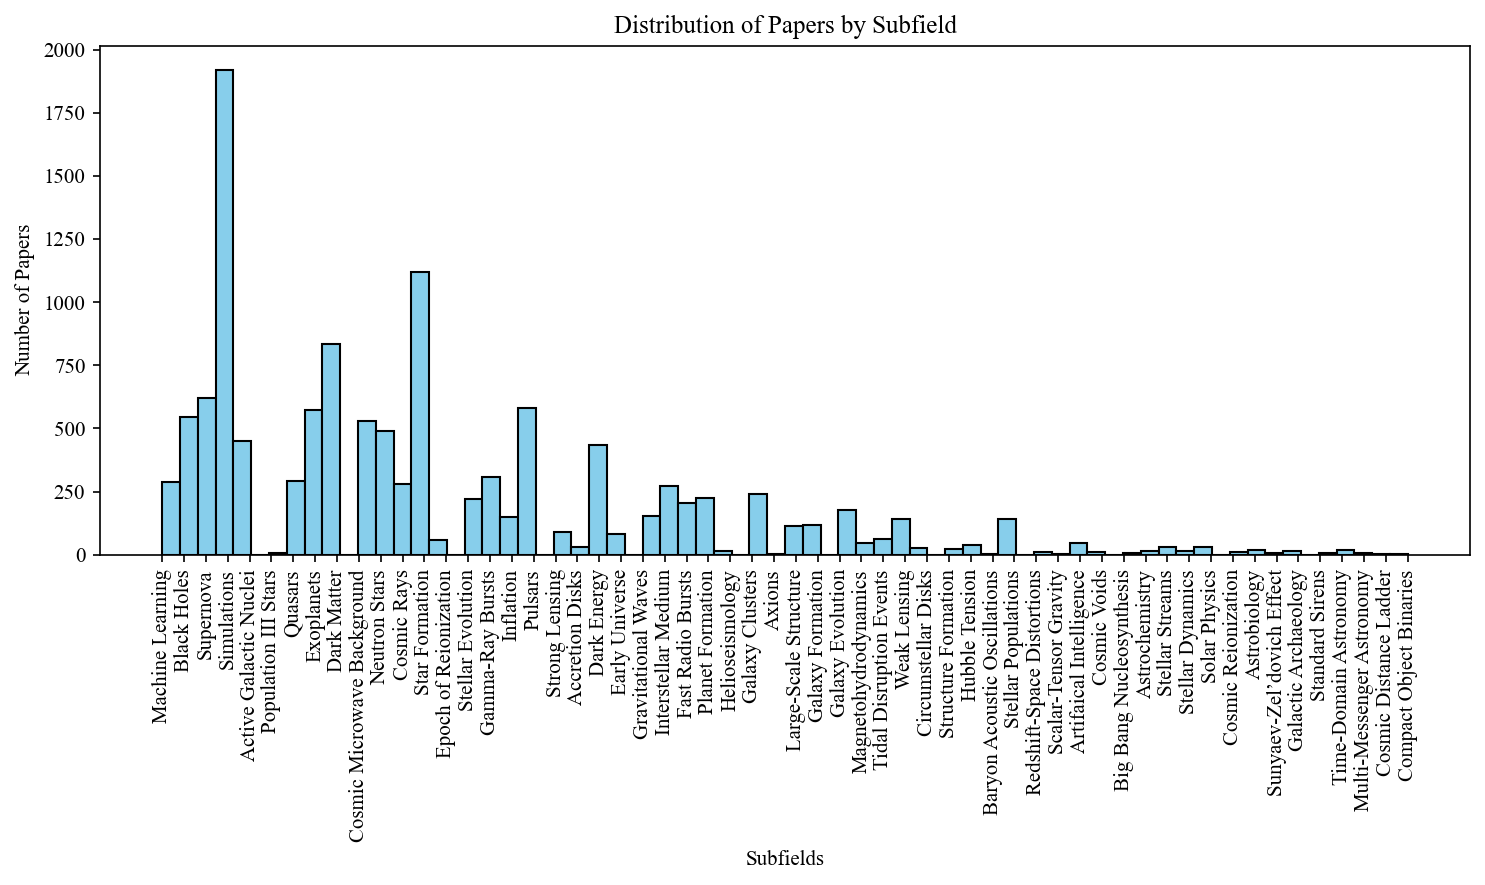

In [23]:
# Filter out 'Unclassified' entries
filtered_subfields = data[data['subfields'] != 'Unclassified']['subfields']

plt.figure(figsize=(10, 6))
plt.hist(filtered_subfields, bins=len(subfields), color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Subfields')
plt.ylabel('Number of Papers')
plt.title('Distribution of Papers by Subfield')
plt.tight_layout()
plt.show()

In [7]:
# Citations per Subfield
citations_per_subfield = data.groupby('subfields')['total_citations'].sum().reset_index()
citations_per_subfield = citations_per_subfield[citations_per_subfield['subfields'] != 'Unclassified']

citations_per_subfield

,subfields,total_citations
0,Accretion Disks,78.0
1,Active Galactic Nuclei,1452.0
2,Artifaical Intelligence,51.0
3,Astrobiology,8.0
4,Astrochemistry,6.0
5,Axions,5.0
6,Baryon Acoustic Oscillations,9.0
7,Big Bang Nucleosynthesis,5.0
8,Black Holes,2294.0
9,Circumstellar Disks,52.0


In [8]:
# Subfield per journal
subfield_journal_counts = data.groupby(['subfields', 'published_journal'])['title'].count().reset_index()
subfield_journal_counts = subfield_journal_counts[subfield_journal_counts['subfields'] != 'Unclassified']
subfield_journal_counts

,subfields,published_journal,title
0,Active Galactic Nuclei,2025NewA..11702361A,1
1,Active Galactic Nuclei,"A&A 693, A62 (2025)",1
2,Active Galactic Nuclei,"A&A, 2025, Vol. 697, Article number A204",1
3,Active Galactic Nuclei,"Academia Quantum, 2025, 2",1
4,Active Galactic Nuclei,"ApJ, 979, 130 (2025)",1
...,...,...,...
1139,Weak Lensing,"Journal = Physica Scripta, year = 2025, month ...",1
1140,Weak Lensing,"Nuclear Physics B 993, 116261 (2023)",1
1141,Weak Lensing,Phys. Lett. B 871 (2025) 140002,1
1142,Weak Lensing,Phys. Rev. Lett. 132 (2024) 021001,1


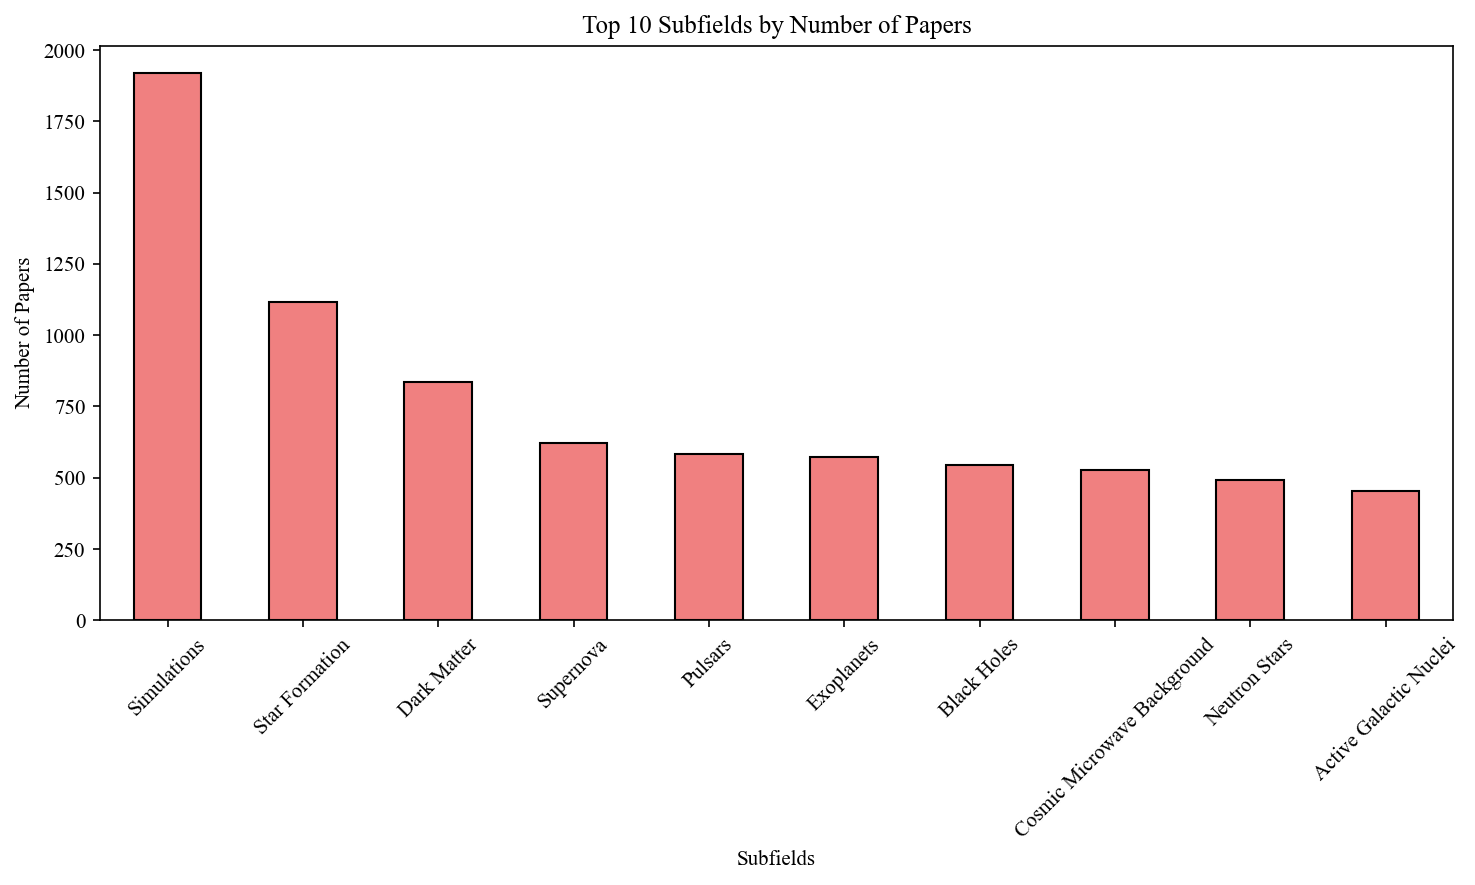

In [24]:
# Display top 10 subfields by number of papers
top_subfields = filtered_subfields.value_counts().head(10)
top_subfields.plot(kind='bar', color='lightcoral', edgecolor='black', rot=45, figsize=(10,6))
plt.xlabel('Subfields')
plt.ylabel('Number of Papers')
plt.title('Top 10 Subfields by Number of Papers')
plt.tight_layout()
plt.show()

In [15]:
# Subfield per paper pages 
subfield_page_counts = data.groupby('subfields')['pages'].mean().reset_index()
subfield_page_counts = subfield_page_counts[subfield_page_counts['subfields'] != 'Unclassified']
subfield_page_counts

,subfields,pages
0,Accretion Disks,18.060606
1,Active Galactic Nuclei,16.861842
2,Artifaical Intelligence,17.869565
3,Astrobiology,20.117647
4,Astrochemistry,26.200000
5,Axions,16.600000
6,Baryon Acoustic Oscillations,21.000000
7,Big Bang Nucleosynthesis,14.428571
8,Black Holes,17.489510
9,Circumstellar Disks,18.703704
